# Lecture 1 Notes

Original content thanks to Carl Henrik Ek (https://mlatcl.github.io/mlphysical/lectures/01-02-beliefs.html)


### What is the point of this course
The intention of the unit is to understand the application of machine learning techniques to real world scenarios. In the real world data tends to be scarce and uncertain, however we often have prior knowledge that has come from past scientific exploits to build on. This idea can be captured nicely in the following image.

![alt text](./img/data_vs_bias.png)

In this course we are looking to extend the reach of machine learning towards the top of left of the chart. This requires encorporating more assumptions to account for the fact that we have less data. The assumption we use tend to come from what we know about the real world.

### Using Bernouilli to understand the basics

Bernouilli distribution encompase those traits that display binary outcomes. Such models can be parameterised using a single parameter $\mu$ that describes how often each outcome is observed. We will use the variable $x$ to refer to a single outcome and $\mathbf{x}$ to refer to a set of $N$ outcomes. With this we can formulate a liklihood that evaluates the data points given our beleifs, a prior which encodes our prior beleif about the parameter value of the system. We use the liklihood and prior to infer a posterior which incorporates both our prior and the evidence from the data.

#### Liklihood
As stated before we will use a Bernouilli distribution as the liklihood function

$$
p(x|\mu) = Bern(x|\mu) = \mu^x(1-\mu)^{1-x}
$$

The distributionis completely parameterised by $\mu$. If we know $\mu$ we can generate we can generate observations that match the real system we are tying to model. The idea is then to use training data to find $\mu$. In order to do this we make the assumption that the outputs of the system are independent and identically distributed (IID).

$$p(\mathbf{x}|\mu) = \prod_{i=1}^N Bern(x|\mu) = \prod_{i=1}^N \mu^x(1-\mu)^{1-x}$$

This formulation encodes both of our assumptions. The variable $\mathbf{x}$ represent the whole dataset. The IID assumptions mean that each datapoint is independent \textcolour{orange}{why does this mean they are invariant to permutations and why is this important?}, and that each datapoint is generated from the same Bernouilli distribution.

#### Prior
The prior is used to encode our beleifs about what we think the parameter $\mu$ is and how it is distributed. One we have decided on a prior we can calculate the posterior using Bayes Rule.

$$
p(\mu|\mathbf{x}) = \frac{p(\mathbf{x}|\mu)p(\mu)}{p(\mathbf{x}}
$$

Given the example of the coin toss is would be reasonable to assume that the coin is unbiased, and that the posterior should follow a Bernouilli distribution. 

$$
p(\mu|\mathbf{x}) = p(\mathbf{x}|\mu)p(\mu)
$$

Therefore, given the posterior is proportional to the joint distribution of the liklihood and the prior. We want to use a prior distribution such that the joint distribution of the prior and the liklihood will be a Bernouilli distribution.

Choosing a prior distribution that is conjugate to the posterior distribution means we can throw away the denominator in Bayes rule. 

<span style="color:blue">Surely there are distributions of p(x) that remove conjugacy of Beta and Bernouilli. What assumptions does this make about the distribution p(x)?</span>

To find the conjugate distribution we use the work done by mathematicians past. [Conjugate priors](https://en.wikipedia.org/wiki/Conjugate_prior)

In the case of the Bernouilli the conjugate prior is the Beta distribution

$$
    Beta(\mu|a,b) = \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\mu^{a-1}(1-\mu)^{b-1}
$$
Where $\Gamma(\cdot)$ is the gamma function.


#### Posterior

The posterior is the joint conditional distribution of the prior and the liklihood
$$
    p(\mu|\mathbf{x}) \propto p(\mu|a,b) \\
    =\prod^N_{i-1} \mu^x_i(1-\mu)^{1-x_i} \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\mu^{a-1}(1-\mu)^{b-1} \\
    =\mu^{\sum_ix_i} (1-\mu)^{\sum_i(1-x_i)} \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)} \mu^{a-1}(1-\mu)^{b-1}\\
    = \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)} \mu^{\sum_ix_i} (1-\mu)^{\sum_i(1-x_i)} \mu^{a-1} (1-\mu)^{b-1}\\
    = \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)} \mu^{\sum_i x_i + a - 1} (1-\mu)^{\sum_i(1-x_i) + b - 1}
$$

Once in this form we can use the trick of conjugacy as the above result can be seen as a Beta distribution.

$$
    p(\mu|\mathbf{x}) = Beta(\mu|a_n, b_n) \propto \mu ^{a_n-1} (1-\mu)^{b_n-1} \\
    a_n - 1 = \sum_i x_i + a - 1 \\
    b_n - 1 = \sum_i (1-x_i) + b - 1
$$

To make this a probability distribution we need the integral over $\mu$ to equal to 1.

$$
1 = Z \int p(\mu|\mathbf{x}) d\mu = Z \mu^{a_n - 1} (1-\mu)^{b_n-1} d\mu
$$

From above we know the normaliser of the Beta distribution is 

$$
    Z = \frac{\Gamma(a_n + b_n)}{\Gamma(a_n)\Gamma(b_n)}
$$

Resulting in the posterior

$$
    p(\mu|\mathbf{x}) = \frac{\Gamma(\sum_ix_i + a + \sum_i(1-x_i) + b)}{\Gamma(\sum_i x_i + a) \Gamma(\sum_i(1-x_i) + b)} \mu^{\sum_i x_i + a - 1} (1-\mu)^{\sum_i (1-x_i) + b - 1}
$$

### Implementation

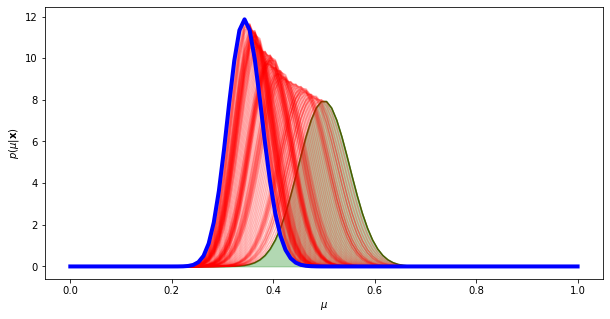

In [3]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt


def posterior(a,b,X):
    a_n = a + X.sum()
    b_n = b + (X.shape[0]-X.sum())
    return beta.pdf(mu_test,a_n,b_n)

# parameters to generate data
mu = 0.2
N = 100

# generate some data
X = np.random.binomial(1,mu,N)
mu_test = np.linspace(0,1,100)

# now lets define our prior
a = 50
b = 50

# p(mu) = Beta(alpha,beta)
prior_mu = beta.pdf(mu_test,a,b)

# create figure
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

# plot prior
ax.plot(mu_test,prior_mu,'g')
ax.fill_between(mu_test,prior_mu,color='green',alpha=0.3)
ax.set_xlabel('$\mu$')
ax.set_ylabel('$p(\mu|\mathbf{x})$')

# lets pick a random (uniform) point from the data
# and update our assumption with this
index = np.random.permutation(X.shape[0])

y = posterior(a,b,X[:index[1]])

for i in range(0,X.shape[0]):
    y = posterior(a,b,X[:index[i]])
    plt.plot(mu_test,y,'r',alpha=0.3)
    np.argmax(y)

# Permutes data running multiple times shows
# the final distribution is invarinant to the order 
# in which the data is provided.
index = np.random.permutation(X.shape[0]) 

X_perm = X[index]
y = posterior(a,b,X_perm)
#y = posterior(a,b,X)

plt.plot(mu_test,y,'b',linewidth=4.0)


#### Reflections

1. What happens if you choose a confident prior far from the true value
2. What happens if you choose a confident prior at the true value
3. Create a plot where the x-axis is the number of data points that you have used to create and the y axis is the distance of the posterior mean to the prior mean
4. How much does the order of data points matter? Permute the data and redo the plot to see.

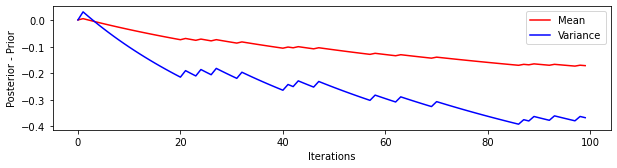

In [4]:
# parameters to generate data
mu = 0.2
N = 100

# generate some data
X = np.random.binomial(1,mu,N)
mu_test = np.linspace(0,1,100)

# now lets define our prior
a = 50
b = 50

# p(mu) = Beta(alpha,beta)
prior_mu = beta.pdf(mu_test,a,b)

# create figure
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(211)
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Posterior - Prior')


# Var and Mean from prior
mean_prior = np.mean(mu_test * np.transpose(prior_mu))
var_prior = np.var(mu_test * np.transpose(prior_mu))


# lets pick a random (uniform) point from the data
# and update our assumption with this
index = np.random.permutation(X.shape[0])

# Save distances to arrays
change_mean = []
change_var = []

# On each iteration calc distance from posterior to prior mean
for i in range(0,X.shape[0]):
    y = posterior(a,b,X[index[range(0,i)]])
    mean_posterior = np.mean(mu_test * y)
    var_posterior = np.var(mu_test * np.transpose(y))
    change_mean.append(mean_posterior - mean_prior)
    change_var.append(var_posterior - var_prior)
    

plt.plot(range(0,X.shape[0]), change_mean,'r')
plt.plot(range(0,X.shape[0]), change_var,'b')
plt.legend(["Mean", "Variance"])



## Linear Regression

The case for linear regression is much the same as for predicting a binary outcome. Only this time we will be fitting a function to a set of observed data. The overriding structure however remains the same. We will will formulate a beleif and we integrate it iwth the observed data to get an updated beleif.

Given a dataset $\mathcal{D} = \{x_i, y_i\}^N_{i=1}$ where there exists a linear function $f(\cdot)$ such that

$$
    y_i = f(x_i)
$$

Our task is then to infer $f(\cdot)$ from $\mathcal{D}$. By making the assumption that $f(\cdot)$ is a linear function 

$$
    y_i = w_1 x_i + w_0 = \mathbf{w}^T\mathbf{x}_i = \left[\begin{array}{c} 
    w_1 \\
    w_0
\end{array}\right]^T
\left[\begin{array}{c} 
    x_i \\
    1
\end{array}\right]
$$

Estimating $f(\cdot)$ can be seen as being parameterised by $\mathbf{w}$ and as such our job is to find $\mathbf{w}$ given $\mathcal{D}$.

### Liklihood

The first assumption we make in our model is that the observations $y_i$ are affected by some additive noise that is independent (\textit{homogeneous}) but always drawn from some unknown Gaussian distribution, with mean 0 and precision (opposite of variance) $\beta$.

$$
    y_i = \mathbf{w}^T \mathbf{x}_i + \epsilon \\
    \epsilon = \mathcal{N}(0, \beta^{-1})
$$

If we can directly observe the noise we will be able to formulate a liklihood

$$
    p(\epsilon) = \mathcal{N}(\epsilon|0, \beta^{-1})
$$

In turn we can rewrite

$$
\begin{aligned}
    y_i = & \mathbf{w}^T\mathbf{x}_i + \epsilon \\
    y_i - \mathbf{w}^T\mathbf{x}_i = & \epsilon
\end{aligned}
$$

This means we can rewrite the liklihood for the noise as

$$
\begin{aligned}
    p(\epsilon) = & \mathcal{N}(\epsilon|0, \beta^{-1}) \\
    = & \mathcal{N}(y_i - \mathbf{w}^T \mathbf{x}_i|0, \beta^{-1}) \\
    = & \mathcal{N}(y_i|\mathbf{w}^T \mathbf{x}_i, \beta^{-1}) \\
\end{aligned}
$$

In the final step we translate the gaussian so that the mean of the Gaussian sits over $\mathbf{w}^T x_i$. This liklihood function can then be used to describe how likely the observed data is to have come from some parametrisation $\mathbf{w}$. More precisely this is the function that quantifies how much evidence a specific data point provides for a specific model.

Now that we have a liklihood we can use the assumption of independence to formulate the liklihood for a whole set of observations as

$$
    p(\mathbf{y}|\mathbf{w}, \mathbf{X}) = \prod^N_{i=1}p(y_i|\mathbf{w},\mathbf{x}_i)
$$

Where $\mathbf{x}_i \in \mathbf{X}$ and $y_i \in \mathbf{y}$. From herin the process is exacly the same as in the Bernouilli, formulate a liklihood, select a prior and then compute a posterior. For each situation the liklihood needs to be justified, some noise can be dependent on the input parameters and in such cases this need be considered. 

We could at this point generate data id we knew our parameters $\mathbf{w}$. However, we want to infer $\mathbf{w}$, to do this we first need to formulate our beleifs over a different parametrisation using a prior distribution.


### Prior

Much like before we use conjugacy to help us select our prior distribution. On this occasion we want a posterior that is Gaussian distributed. We start by assuming that $\beta$ is known. The conjugate distribution of a Gaussian with known variance is a Gaussian (_self-conjugacy_).

$$
    p(\mathbf{w}) = \mathcal{N}(\mathbf{w}_0, \mathbf{S}_0)\\
    \mathbf{S}_0 = \lambda \mathbf{I}
$$

This prior encodes two asumptions (1) that the two parameters $w_0$ and $w_1$ are independent and have equal variance.

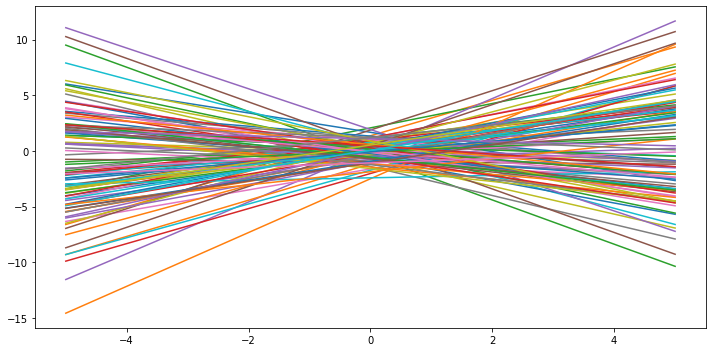

In [5]:
import numpy as np
import matplotlib.pyplot as plt
def plot_line(ax, w):
    # input data
    X = np.zeros((2,2))
    X[0,0] = -5.0
    X[1,0] = 5.0
    X[:,1] = 1.0
    # because of the concatenation we have to flip the transpose
    y = w.dot(X.T)
    ax.plot(X[:,0], y)
    
# create prior distribution
tau = 1.0*np.eye(2)
w_0 = np.zeros((2,1))

# sample from prior
n_samples = 100
w_samp = np.random.multivariate_normal(w_0.flatten(), tau, size=n_samples)

# create plot
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
for i in range(0, w_samp.shape[0]):
    plot_line(ax, w_samp[i,:])

# save fig
plt.tight_layout()



### Posterior

Now that we have a prior and liklihood we can calculate our posterior. Conceptually we do exactly the same as before the maths however is a little more difficult
1. The posterior is proportional to the liklihood times the prior.
$$
p(\mathbf{w}|\mathbf{y},\mathbf{X}) \propto p(\mathbf{y}| \mathbf{X}, \mathbf{w})p(\mathbf{w})
$$
2. Due to conjugacy we know the posterior is Gaussian
$$
p(\mathbf{w}|\mathbf{y},\mathbf{X}) = \mathcal{N}(\mathbf{w}|\mu(\mathbf{y}, \mathbf{X}), \sigma(\mathbf{y}, \mathbf{X})
$$

A little bit of mathematics later and we can derive the posterior distribution. 

$$
p(\mathbf{w}|\mathbf{y},\mathbf{X}) = \mathcal{N}(\mathbf{w}|(\mathbf{S}_0^{-1} + \beta\mathbf{X}^T\mathbf{X})^{-1}(\mathbf{S}_0^{-1}\mathbf{w}_0 + \beta\mathbf{X}^T\mathbf{y}), (\mathbf{S}_0^{-1} + \beta\mathbf{X}^T\mathbf{X})^{-1})
$$

How this is done exactly is broken down in the section titled Gaussian identities.

<span style="color:blue">Build an intuition on this function</span>


### Implementation

One again we will evaluate the model by generating some data and then aiming to recover the parameters that generatd the specific data, much in the same way as was done with the Bernouilli trial.

We start by deciding on some parameters

$$
    y_i = \mathbf{w}^T\mathbf{x}_i + \epsilon \\
    \epsilon \approx \mathcal{N}(0,0.3) \\
    \mathbf{X} = \left[
        \begin{array}{cc}
        -1 & 1 \\
        -0.99 & 1 \\
        \vdots & \vdots \\
        1 & 1
        \end{array}\right] \\
    \mathbf{w} = \left[
        \begin{array}{c}
        -1.3 \\
        0.5 \\
        \end{array}\right]
$$

Visualise the prior over $\math{w}$. 

In [2]:
"""
Create a contour plot of a two-dimensional normal distribution
Parameters
----------
ax : axis handle to plot
mu : mean vector 2x1
Sigma : covariance matrix 2x2
"""
from scipy.stats import multivariate_normal
import numpy as np

# Function to plot distribution
def plotdistribution(ax,mu,Sigma):
    x = np.linspace(-3,3,100)
    x1p, x2p = np.meshgrid(x,x)
    pos = np.vstack((x1p.flatten(), x2p.flatten())).T
    pdf = multivariate_normal(mu.flatten(), Sigma)
    Z = pdf.pdf(pos)
    Z = Z.reshape(100,100)
    ax.contour(x1p,x2p,Z, 5, colors='r')
    ax.set_xlabel('w_0')
    ax.set_ylabel('w_1')
    return

# Function to compute posterior
def compute_posterior(w, Sigma, beta, X, y):
    # Calculate mu
    mu_denom = np.linalg.inv(np.linalg.inv(Sigma) + beta*X.T*X)
    mu_nom = np.linalg.inv(Sigma)*w + beta*X.T*y
    mu = mu_denom * mu_nom
    
    # Calculate sigma
    Sigma = np.linalg.inv(np.linalg.inv(Sigma) + beta*X.T*X)
    
    return mu, Sigma

# Create model
X = np.matrix([np.linspace(-1,1,201),np.ones(201)]).T
w = np.matrix([2, 0.5]).T
ep = multivariate_normal(0, 0.3)
y = np.matrix(w.T*X.T + ep.rvs(len(X))).T


# create and sample from prior
w_0 = np.matrix([0, 0]).T
Sigma_0 = np.eye(2)
n_samples = 5
w_samp = np.random.multivariate_normal(np.asarray(w_0).flatten(), Sigma_0, size=n_samples)

# create figure
fig = plt.figure(figsize=(10,10))

# plot prior
ax = fig.add_subplot(6,2,1)
plotdistribution(ax, np.asarray(w_0).flatten(), Sigma_0)
ax = fig.add_subplot(6,2,2)

for i in range(0, w_samp.shape[0]):
    plot_line(ax, w_samp[i,:])
    
    
w=w_0
Sigma = Sigma_0
beta = 1
index = np.random.permutation(X.shape[0])
n_fig = 2


for i in range(0, 15):
    X_i = X[index[i],:]
    y_i = y[index[i]]
    
    # compute posterior
    w, Sigma = compute_posterior(w, Sigma, beta, X_i, y_i)
    
        
    # print out the mean of the posterior

    if (np.mod(i, 3) == 1):
        
        # visualise posterior
        w_samp = np.random.multivariate_normal(np.asarray(w).flatten(), Sigma, size=n_samples)

        # visualise samples from posterior with the data
        n_fig = n_fig + 1
        ax = fig.add_subplot(6,2,n_fig)
        plotdistribution(ax, np.asarray(w).flatten(), Sigma)
        n_fig = n_fig + 1
        ax = fig.add_subplot(6,2,n_fig)

        for i in range(0, w_samp.shape[0]):
            plot_line(ax, w_samp[i,:])

    

    

NameError: name 'plt' is not defined

### Predictive Posterior

Now that we have learned the parameters of the function we want to make predicitons. This means we want to take an input location $\textbf{x_*}$ and return a distribution of what we expect the output location to be. We do this by marginalising out the parameters of $\textbf{w}$. In other words we generate all possible lines and weight them by how much we beleive in them based on what we have learned.

$$
p(y_*|\mathbf{x_*}, \mathbf{X}, \mathbf{y}) = \int p(y_*|\mathbf{x_*}, \mathbf{w})p(\mathbf{w}|\mathbf{X},\mathbf{y})d\mathbf{w}
$$

Given that both the liklihood for a new point and the posterior distribution are both Gaussian, the integral itself will also be Gaussian. We can therfore compute this integral in closed form

$$
p(y_*|\mathbf{x_*}, \mathbf{X}, \mathbf{y}) = \mathcal{N}(\mathbf{y}|\mathbf{m}^T_N\mathbf{x_*}, \beta^{-1}+\mathbf{x_*^T}\mathbf{S_N}\mathbf{x_*})
$$

where $\mathbf{m_N}$ and $\mathbf{S_N}$ is the posterior mean and variance for $\mathbf{w}$ having seen $N$ points from the training data.

In [2]:

def predictiveposterior(m0, S0, beta, x_star, X, y):
    mN, SN = posterior(m0, S0, beta, X, y) # Need Posterior Func
    m_star = mN.T.dot(x_star)
    S_star = 1.0/beta + x_star.T.dot(SN).dot(x_star)
    return m_star, S_sta

### Non-Linear Basis Functions

Working with non-linear functions is relatively easy. One simply maps the input data to a different space and performs the linear regression in that new space

$$
\Phi: \mathcal{X} \mapsto \mathcal{Z}\\
y_i = \mathbf{w}^T\Phi(\mathbf{x}_i) + \epsilon
$$

An example mapping could be the exponential function

$$
\Phi_d(x_i) = e^{-(x_i-b_d)^T(x_i-b_d)}
$$

Where $b_d$ is the center of the basis function.